In [642]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-predictions/st.ipynb
/kaggle/input/student-performance-predictions/student_performance.csv
/kaggle/input/student-performance-predictions/best_student_performance_model.pkl


In [643]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [644]:
it=pd.read_csv("/kaggle/input/student-performance-predictions/student_performance.csv")
it

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [645]:
it.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 848.0+ bytes


In [646]:
it.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,85.600000,17.700000,78.100000,1.500000,80.200000
std,3.02765,7.441625,6.848357,10.170218,1.080123,10.097304
min,1.00000,70.000000,8.000000,60.000000,0.000000,62.000000
25%,3.25000,82.750000,12.750000,71.750000,1.000000,73.500000
50%,5.50000,86.500000,17.500000,80.000000,1.500000,82.500000
75%,7.75000,90.750000,21.500000,85.750000,2.000000,87.750000
max,10.00000,95.000000,30.000000,90.000000,3.000000,92.000000


In [647]:
it.isna().sum()

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64

In [648]:
it['Gender'].value_counts()

Gender
Male      5
Female    5
Name: count, dtype: int64

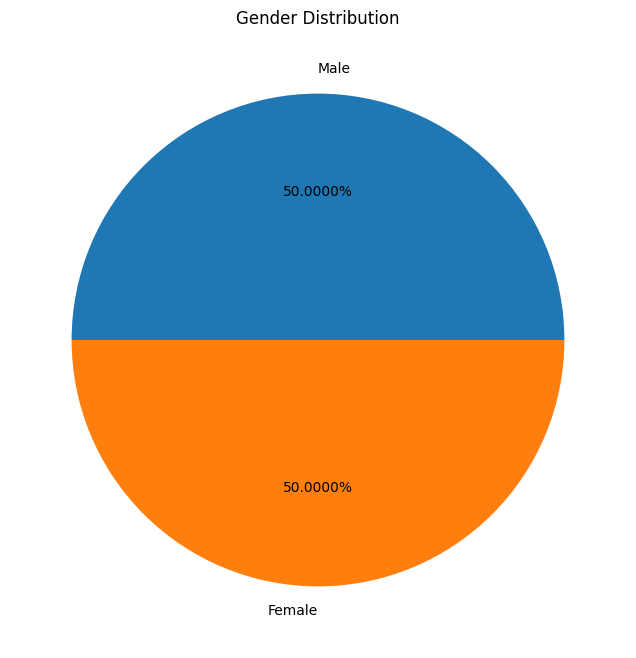

In [649]:
plt.figure(figsize=(8, 8))
plt.pie(it['Gender'].value_counts(), labels=it['Gender'].value_counts().index, autopct='%1.4f%%')
plt.title('Gender Distribution')
plt.show()

In [650]:
it['AttendanceRate'].mean()

85.6

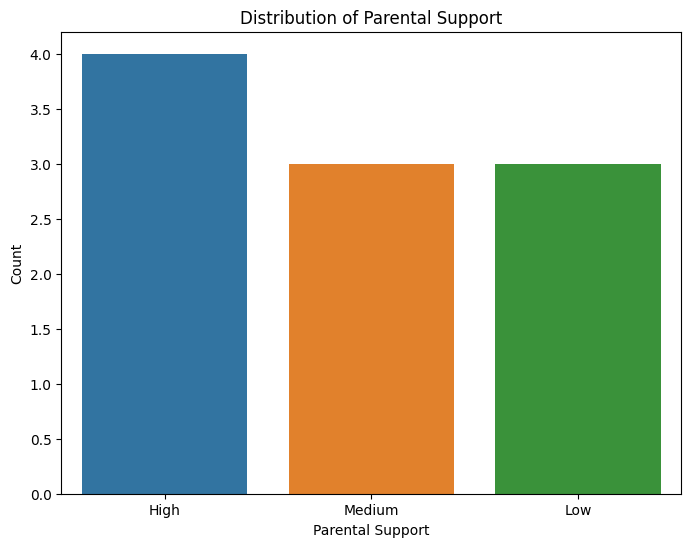

In [651]:
plt.figure(figsize=(8, 6))
sns.countplot(data=it, x='ParentalSupport')
plt.title('Distribution of Parental Support')
plt.xlabel('Parental Support')
plt.ylabel('Count')
plt.show()

<Axes: >

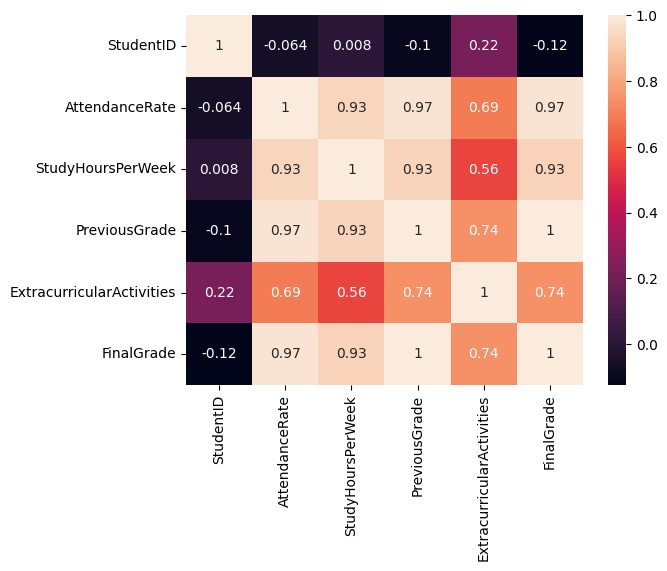

In [652]:
sns.heatmap(it.corr(numeric_only=True),annot=True)

In [653]:
it.groupby(["Name"])[['FinalGrade']].max()

,FinalGrade
Name,
Alex,68
Daniel,62
Emma,85
Isabella,88
James,72
John,80
Michael,92
Olivia,90
Sarah,87


In [654]:
it_AttendanceRate_Name=it.groupby(["Name","AttendanceRate"]).size().reset_index(name='Count')
it_AttendanceRate_Name

,Name,AttendanceRate,Count
0,Alex,78,1
1,Daniel,70,1
2,Emma,88,1
3,Isabella,91,1
4,James,82,1
5,John,85,1
6,Michael,92,1
7,Olivia,95,1
8,Sarah,90,1
9,Sophia,85,1


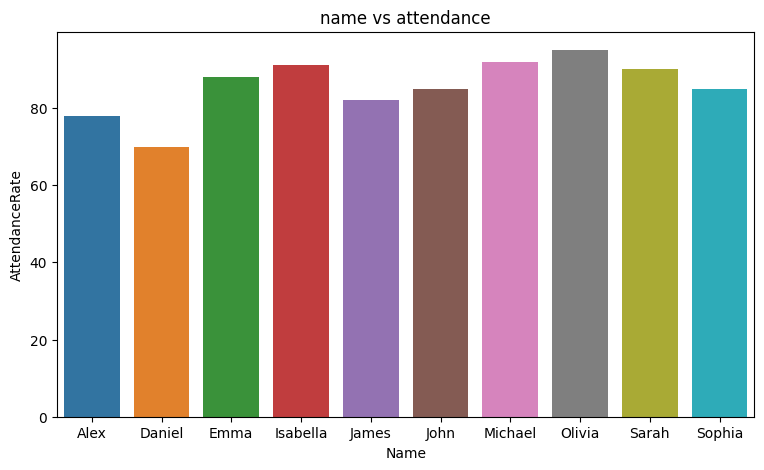

In [655]:
plt.figure(figsize= (9,5))
sns.barplot(x="Name",y="AttendanceRate", data=it_AttendanceRate_Name)
plt.title("name vs attendance")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


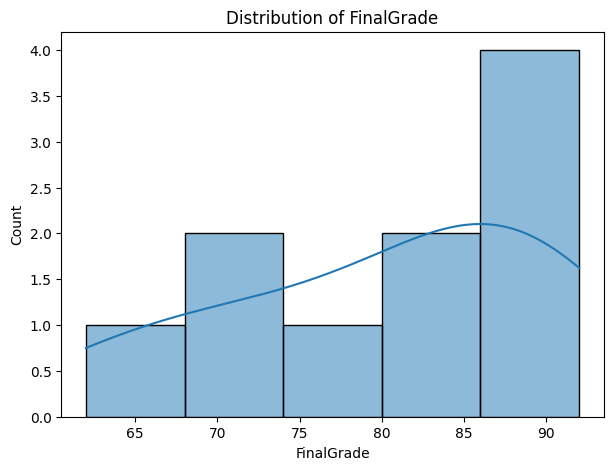

In [656]:
plt.figure(figsize=(7, 5))
sns.histplot(it['FinalGrade'], kde=True)
plt.title('Distribution of FinalGrade')
plt.xlabel('FinalGrade')
plt.ylabel('Count')
plt.show()

In [657]:
it.ExtracurricularActivities.value_counts()

ExtracurricularActivities
1    3
2    3
0    2
3    2
Name: count, dtype: int64

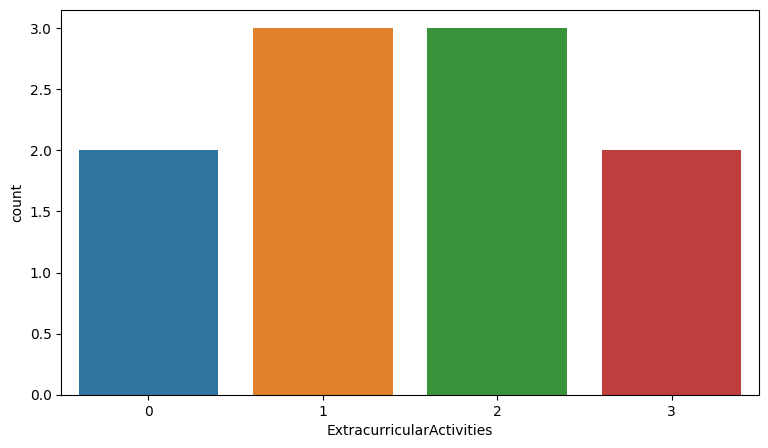

In [658]:
plt.figure(figsize= (9,5))
sns.countplot(x='ExtracurricularActivities', data=it)
plt.show()

In [659]:
it.Gender.value_counts()

Gender
Male      5
Female    5
Name: count, dtype: int64

In [660]:
it.groupby(["Gender"])[['ExtracurricularActivities']].max()

,ExtracurricularActivities
Gender,
Female,3
Male,3


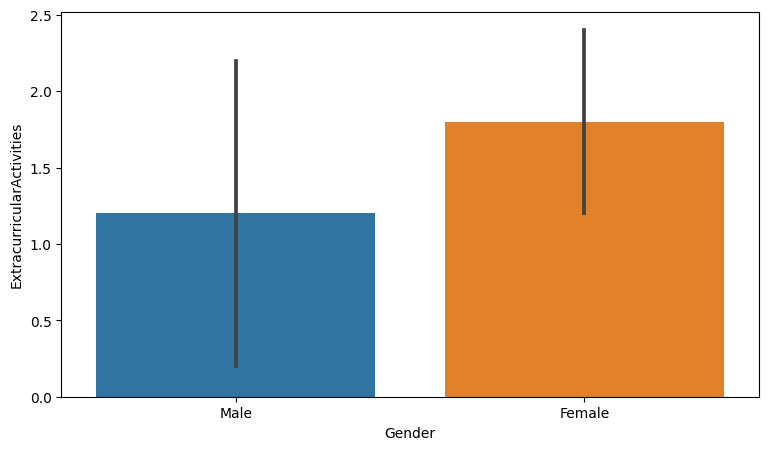

In [661]:
plt.figure(figsize= (9,5))
sns.barplot(x='Gender', y='ExtracurricularActivities', data=it)
plt.show()

In [662]:
it_StudyHoursPerWeek_FinalGrade= it.groupby(["StudyHoursPerWeek","FinalGrade"]).size().reset_index(name='Count')
it_StudyHoursPerWeek_FinalGrade

,StudyHoursPerWeek,FinalGrade,Count
0,8,62,1
1,10,68,1
2,12,72,1
3,15,80,1
4,17,78,1
5,18,85,1
6,20,87,1
7,22,88,1
8,25,92,1
9,30,90,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


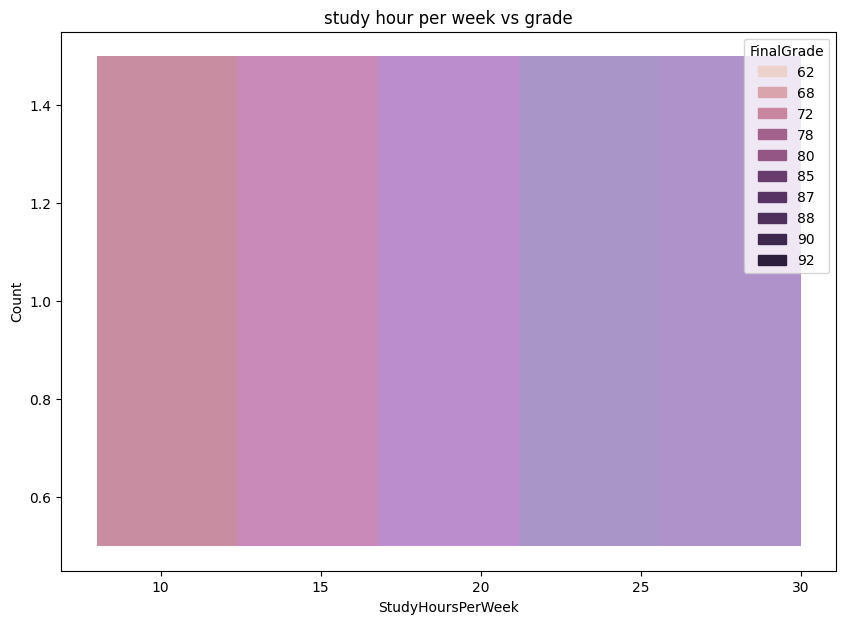

In [663]:
plt.figure(figsize= (10,7))
sns.histplot(x="StudyHoursPerWeek",y="Count", hue="FinalGrade", data=it_StudyHoursPerWeek_FinalGrade, kde=False)
plt.title("study hour per week vs grade")
plt.show()

In [664]:
it.StudyHoursPerWeek.value_counts()

StudyHoursPerWeek
15    1
20    1
10    1
25    1
18    1
30    1
8     1
17    1
12    1
22    1
Name: count, dtype: int64

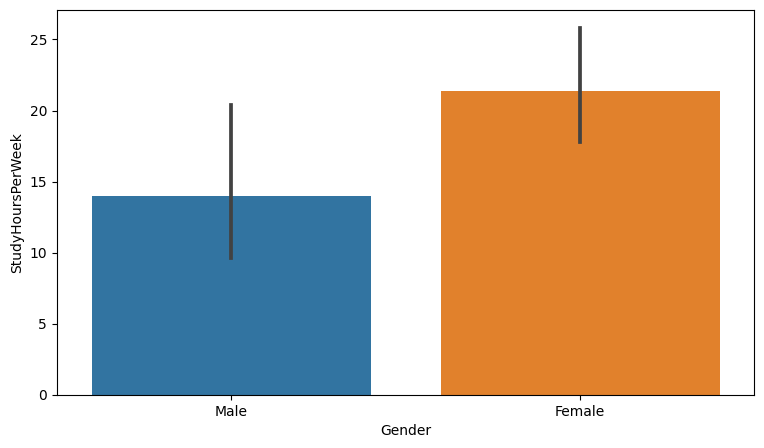

In [665]:
plt.figure(figsize= (9,5))
sns.barplot(x='Gender', y='StudyHoursPerWeek', data=it)
plt.show()

In [666]:
it.groupby(["Gender"])[['StudyHoursPerWeek']].max()

,StudyHoursPerWeek
Gender,
Female,30
Male,25


In [667]:
it.groupby(["Gender"])[['StudyHoursPerWeek']].min()

,StudyHoursPerWeek
Gender,
Female,17
Male,8


In [668]:
it.groupby(["Gender"])[['FinalGrade']].max()

,FinalGrade
Gender,
Female,90
Male,92


In [669]:
it.groupby(["Gender"])[['FinalGrade']].min()

,FinalGrade
Gender,
Female,78
Male,62


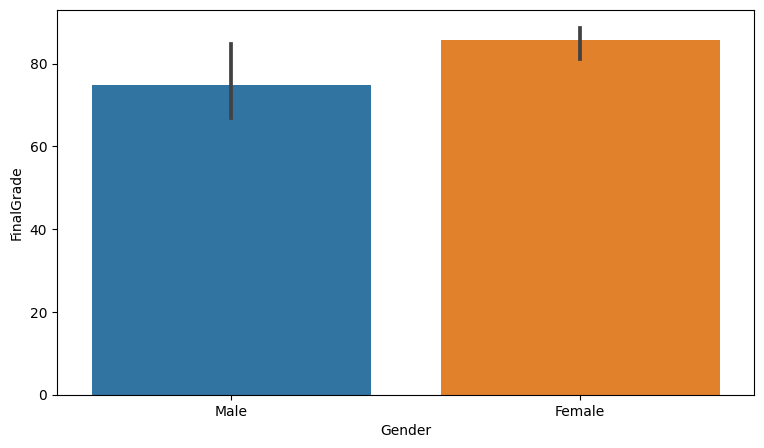

In [670]:
plt.figure(figsize= (9,5))
sns.barplot(x='Gender', y='FinalGrade', data=it)
plt.show()

In [671]:
it.groupby(["Gender"])[['ParentalSupport']]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


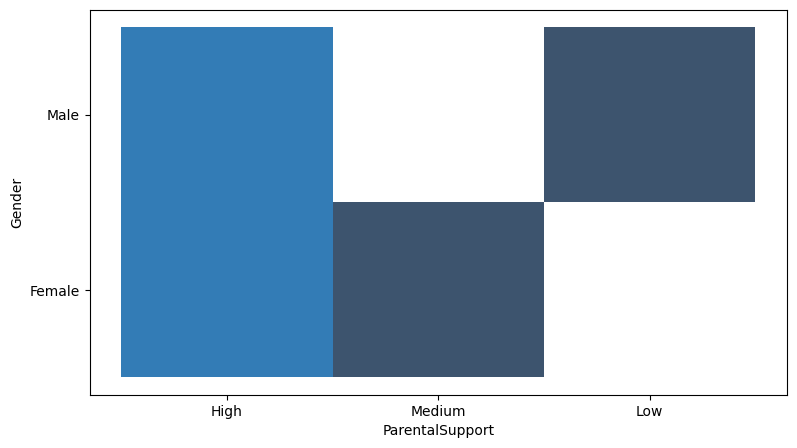

In [672]:
plt.figure(figsize= (9,5))
sns.histplot(x='ParentalSupport', y='Gender', data=it)
plt.show()

<Axes: xlabel='AttendanceRate', ylabel='StudyHoursPerWeek'>

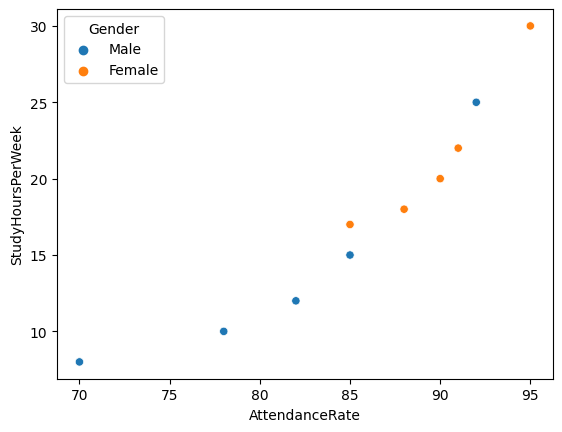

In [673]:
sns.scatterplot(data=it,x='AttendanceRate',y='StudyHoursPerWeek',hue='Gender')


In [674]:
it.groupby('AttendanceRate')['FinalGrade'].mean().reset_index()

,AttendanceRate,FinalGrade
0,70,62.0
1,78,68.0
2,82,72.0
3,85,79.0
4,88,85.0
5,90,87.0
6,91,88.0
7,92,92.0
8,95,90.0


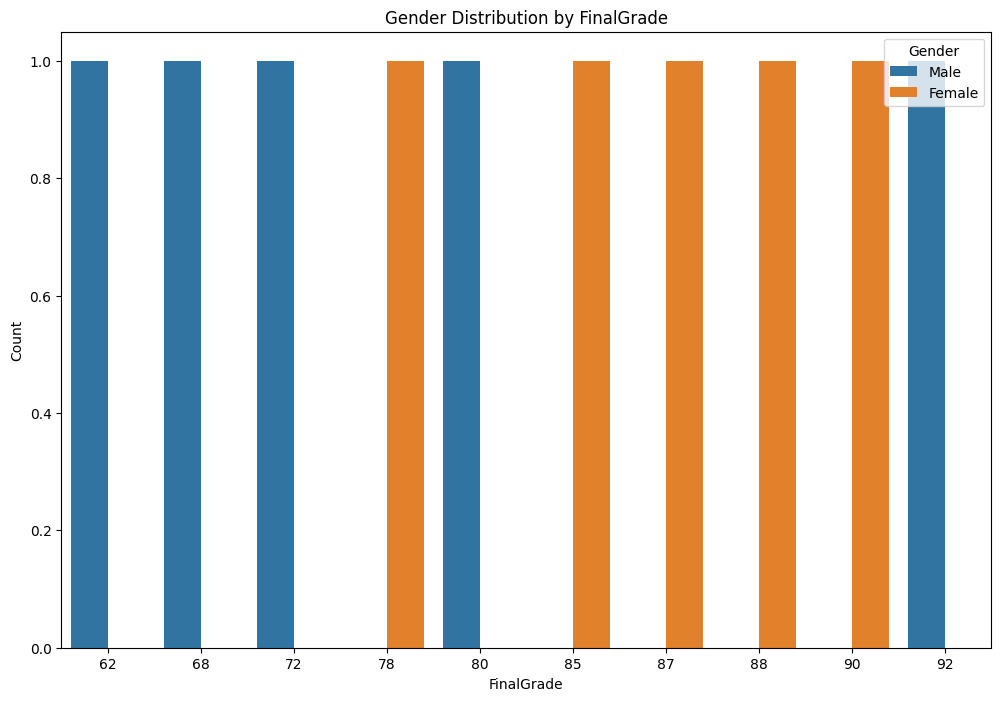

In [675]:
plt.figure(figsize=(12, 8))
sns.countplot(data=it, x='FinalGrade', hue='Gender')
plt.title('Gender Distribution by FinalGrade')
plt.xlabel('FinalGrade')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [676]:
import pandas as pd
itr=pd.get_dummies(it['ExtracurricularActivities'])
itr

,0,1,2,3
0,False,True,False,False
1,False,False,True,False
2,True,False,False,False
3,False,False,False,True
4,False,False,True,False
5,False,True,False,False
6,True,False,False,False
7,False,True,False,False
8,False,False,True,False
9,False,False,False,True


In [677]:
pdata1=pd.concat([it,itr], axis=1)
pdata1.drop(['ExtracurricularActivities'],inplace=True, axis=1)
pdata1.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ParentalSupport,FinalGrade,0,1,2,3
0,1,John,Male,85,15,78,High,80,False,True,False,False
1,2,Sarah,Female,90,20,85,Medium,87,False,False,True,False
2,3,Alex,Male,78,10,65,Low,68,True,False,False,False
3,4,Michael,Male,92,25,90,High,92,False,False,False,True
4,5,Emma,Female,88,18,82,Medium,85,False,False,True,False


In [678]:
X=it.iloc[:,[2,3]].values
y=it.iloc[:,4].values

In [679]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)
print("Train:",X_train,y_train, "Test:",X_test,y_test)


Train: [['Male' 70]
 ['Male' 92]
 ['Female' 90]
 ['Male' 85]
 ['Female' 85]
 ['Female' 88]
 ['Female' 91]] [ 8 25 20 15 17 18 22] Test: [['Male' 82]
 ['Male' 78]
 ['Female' 95]] [12 10 30]


In [680]:
import pandas as pd

# Sample data
data = pd.DataFrame({'ExtracurricularActivities': ['70', '80', '68', '92', '85',]})

# One hot encode
encoded_data = pd.get_dummies(data, columns=['ExtracurricularActivities'])
print(encoded_data)




   ExtracurricularActivities_68  ExtracurricularActivities_70  \
0                         False                          True   
1                         False                         False   
2                          True                         False   
3                         False                         False   
4                         False                         False   

   ExtracurricularActivities_80  ExtracurricularActivities_85  \
0                         False                         False   
1                          True                         False   
2                         False                         False   
3                         False                         False   
4                         False                          True   

   ExtracurricularActivities_92  
0                         False  
1                         False  
2                         False  
3                          True  
4                         False  


In [681]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Sample data
data = np.array([['68'], ['70'], ['80'],['85'], ['90'] ])

# Initialize encoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform data
encoded_data = encoder.fit_transform(data)
print(encoded_data)


[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [682]:

X = encoded_data[:, :1]  
y = encoded_data[:, 1]   


In [701]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=10)
print("Train:",X_train,y_train, "Test:",X_test,y_test)


Train: [[0.]
 [1.]
 [0.]
 [0.]] [0. 0. 0. 1.] Test: [[0.]] [0.]


In [702]:
len(y_test)

1

In [703]:
len(X_train)

4

In [686]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [704]:
X_train

array([[0.],
       [1.],
       [0.],
       [0.]])

In [688]:
from sklearn.svm import SVC
svmc= SVC(C=10)
svmc.fit(X_train, y_train)
y_pred=svmc.predict(X_test)

In [705]:
svmc.score(X_test, y_test)

1.0

In [690]:
from sklearn.svm import SVC
svmc1= SVC ( gamma='1', kernel="linear",random_state=None)
svmc1.fit(X_train, y_train)
y_pred1=svmc1.predict(X_test)


In [711]:
svmc1.score(X_test, y_test)

1.0

In [692]:
from sklearn.metrics import classification_report, accuracy_score
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [712]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[1]])